# assumption 1: larger communities require smaller $\kappa$

In [1]:
%matplotlib inline

In [2]:
from run_experiment_effect_of_seed_size import *
from helpers import degree_diag, signed_layout, draw_nodes, draw_edges, get_borderless_fig
from data_helpers import make_polarized_graphs_fewer_parameters

In [3]:
random.seed(12345)
np.random.seed(12345)

In [17]:
k1, k2 = 8, 2
nc = [(10, 10) for _ in range(k1)]
nc += [(100, 100) for _ in range(k2)]
g, true_comms, true_groupings = make_polarized_graphs_fewer_parameters(nc, 0, k1 + k2, 0.1)

In [18]:
noise_level(g)

0.2693213949104618

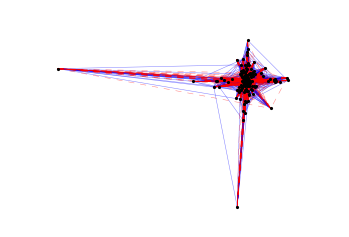

In [19]:
fig, ax = get_borderless_fig()
pos = signed_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10, ax=ax, linewidths=0, node_color='black')
draw_edges(g, pos, ax=ax, width=0.5, alpha=0.5)

In [20]:
from helpers import sample_seeds
seeds1, target_comm1 = sample_seeds(true_comms, true_groupings, target_comm=1)
seeds2, target_comm2 = sample_seeds(true_comms, true_groupings, target_comm=k1)

In [ ]:
kappa = 0.95

In [ ]:
res1 = run_pipeline(g, seeds1, kappa, target_comm1, true_comms, true_groupings, verbose=0)

In [ ]:
res2 = run_pipeline(g, seeds2, kappa, target_comm2, true_comms, true_groupings, verbose=0)

In [ ]:
res1

In [ ]:
res2

In [21]:
kappa_list = np.linspace(0.1, 0.99, 16)

res1_list = Parallel(n_jobs=-1)(
    delayed(run_pipeline)(
        g, seeds1, kappa, target_comm1, true_comms, true_groupings, verbose=0
    )
    for kappa in tqdm(kappa_list)
)

res2_list = Parallel(n_jobs=-1)(
    delayed(run_pipeline)(
        g, seeds2, kappa, target_comm2, true_comms, true_groupings, verbose=0
    )
    for kappa in tqdm(kappa_list)
)


100%|██████████| 16/16 [00:48<00:00,  1.09s/it]

100%|██████████| 16/16 [00:47<00:00,  1.10s/it]


In [22]:
df1 = pd.DataFrame.from_records(res1_list)
df2 = pd.DataFrame.from_records(res2_list)

In [23]:
df1.head()

,C1,C1_size,C2,C2_size,C_size,f1_L1,f1_L2,kappa,min_beta,prec_L1,prec_L2,rec_L1,rec_L2,seeds
0,"[23, 460, 461, 462, 463, 464, 465, 466, 467, 4...",101,"[39, 360, 361, 362, 363, 364, 365, 366, 367, 3...",101,202,0.018018,0.009901,0.100000,0.207327,0.009901,0.009901,0.1,0.009901,"[39, 23]"
1,"[23, 460, 461, 462, 463, 464, 465, 466, 467, 4...",101,"[39, 360, 361, 362, 363, 364, 365, 366, 367, 3...",101,202,0.018018,0.009901,0.159333,0.207327,0.009901,0.009901,0.1,0.009901,"[39, 23]"
2,"[23, 460, 461, 462, 463, 464, 465, 466, 467, 4...",101,"[39, 360, 361, 362, 363, 364, 365, 366, 367, 3...",101,202,0.018018,0.009901,0.218667,0.207327,0.009901,0.009901,0.1,0.009901,"[39, 23]"
3,"[23, 460, 461, 462, 463, 464, 465, 466, 467, 4...",101,"[39, 360, 361, 362, 363, 364, 365, 366, 367, 3...",101,202,0.018018,0.009901,0.278000,0.207327,0.009901,0.009901,0.1,0.009901,"[39, 23]"
4,"[23, 28, 460, 461, 462, 463, 464, 465, 466, 46...",102,"[31, 39, 360, 361, 362, 363, 364, 365, 366, 36...",102,204,0.035714,0.019608,0.337333,0.208361,0.019608,0.019608,0.2,0.019608,"[39, 23]"


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


(0, 1.1)

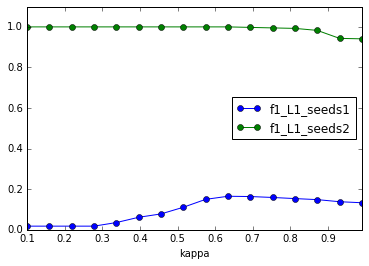

In [29]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1)
df1.plot(x='kappa', y=['f1_L1'], style='o-', ax=ax)
df2.plot(x='kappa', y=['f1_L1'], style='o-', ax=ax)
ax.legend(['f1_L1_seeds1', 'f1_L1_seeds2'], loc='best')
ax.set_ylim([0, 1.1])